### Alignment 3: few state dynamics & quantum beats #

**Author: Paul Hockett, National Research Council of Canada, paul.hockett@nrc.ca, http://femtolab.ca**

To accompany the book Quantum Metrology with Photoelectrons, for more see:
* [Book webpages on femtolab.ca](http://femtolab.ca/?tag=metrology-book "Book webpages")
* [OSF project page (accompanying materials)](https://osf.io/q2v3g/ "OSF project page")
* [On Github (accompanying codes)](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons "Book code')


v2, 15th March 2019 - added discussion on electronic & nuclear components.

v1, 13th March 2019

Latest version of this notebook on Github: https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-3.ipynb

***
This set of notebooks presents some material for atomic and molecular angular momentum & alignment. 
1. [The basic formal machinery: density matrices and state multipoles.](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-1.ipynb)
2. Application to rotational state-resolved scenarios. (In preparation.)
3. Application to few-state dynamics and quantum beats. (This notebook.)

For more details and background, see a [Very Brief Introduction to Angular Momentum (lecture notes)](https://doi.org/10.6084/m9.figshare.4003371.v2), and the textbooks from Blum [1] and Zare [2]. The treatment herein is drawn primarily from Blum; a similar treatment and extended discussion can also be found in Fano & Macek [5].

***
**References**

[1] Blum, K. (2012). Density Matrix Theory and Applications (3rd Editio, Vol. 64). Berlin, Heidelberg: Springer Berlin Heidelberg. https://doi.org/10.1007/978-3-642-20561-3

[2] Zare, R. N. (1988). Angular Momentum: Understanding spatial aspects in chemistry and physics. John Wiley & Sons.

[3] Hockett, P. (2018). Quantum Metrology with Photoelectrons, Volume 1 Foundations. IOP Publishing. https://doi.org/10.1088/978-1-6817-4684-5 (See also links at top of document.)

[4] Forbes, R., Makhija, V., Underwood, J. G., Stolow, A., Wilkinson, I., Hockett, P., & Lausten, R. (2018). Quantum-beat photoelectron-imaging spectroscopy of Xe in the VUV. Physical Review A, 97(6), 063417. https://doi.org/10.1103/PhysRevA.97.063417; also [arXiv 1803.01081](http://arxiv.org/abs/1803.01081); and [web version on authorea](https://www.authorea.com/users/71114/articles/188337-quantum-beat-photoelectron-imaging-spectroscopy-of-xe-in-the-vuv).

[5] Fano, U., & Macek, J. H. (1973). Impact Excitation and Polarization of the Emitted Light. Reviews of Modern Physics, 45(4), 553–573. https://doi.org/10.1103/RevModPhys.45.553

***

# Few-state dynamics #

In many physical processes, multiple eigenstates of the system are populated. This may be the result of thermal effects, in which case the states are incoherent, or via a coherent preparation process. In the latter case, the overall state of the system can be considered as a wavepacket, and will evolve in time. Assuming that the wavepacket is created “instantaneously” (with respect to the timescale of system/wavepacket evolution), such as via photon-absorption from a short laser pulse, then the ensuing dynamics is simply dependent on the phase-evolution of the eigenstates which form the superposition state.

A textbook example is the preparation of a superposition of hyperfine states in rare gas atoms via photo-absorption. Typically, a small number of hyperfine states are prepared, and their evolution results in relatively simple wavepacket behaviour, exhibiting clear quantum beats, correlated with a changing alignment of the charge distribution. A full treatment can be found in Sect. 4.7 of Blum's book [1].

For the case of quantum beats from a manifold of (hyperfine) states,
the state multipoles can be expressed as a product of an initial
state, and time-dependent coefficients, as per Eqns. 4.131 and 4.134
in Blum [1]:

\begin{equation}
\langle T(J;t)_{KQ}^{\dagger} \rangle =G(J;t)_{K}\langle T(J)_{KQ}^{\dagger}\rangle
\end{equation}

where

\begin{equation}
G(J;t)_{K}=\frac{1}{2I+1}\sum_{F',F}(2F'+1)(2F+1)\left\{ \begin{array}{ccc}
J & F' & I\\
F & J & K
\end{array}\right\} ^{2}\cos\left[\frac{(E_{F'}-E_{F})t}{\hbar}\right]
\end{equation}

and $\{...\}$ is a $6j$ symbol, $J$ is the electronic angular momentum,
$I$ the nuclear spin and $F,\,F'$ are hyperfine states that comprise the superposition (wavepacket).

Hence, $\langle T(J)_{KQ}^{\dagger}\rangle$ defines the initial state
of the system after preparation (defined by the state multipoles), and the time-evolution of the superposition
is given by $G(J;t)_{K}$. This contains the angular momentum coupling
between the hyperfine states (defined by the $6j$ symbol), and the
relative phase evolution of the states, expressed in terms of their
energy differences.

## G parameters ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.physics.wigner import wigner_6j
from scipy.constants import hbar

In [2]:
# Define G(J;t)K, time-dependent part, single t or list t
# Set hbar = 1 to work in natural units

def GJt(J,t,K,I,F,EF):
    # Set for single or array t
    if type(t) is int:
        G = 0
    else: 
        G = np.zeros(t.shape[0])

    # Loop over pairs from a list of F states and energies
    for n1 in range(0,len(F),1):
        for n2 in range(0,len(F),1): 
            Gterm = (2*F[n2]+1)*(2*F[n1]+1)*(wigner_6j(J,F[n2],I,F[n1],J,K)**2)*np.cos((EF[n2] - EF[n1])*t)
            
            G = np.add(G,Gterm)  # Allows for vector G addition
    
    return G*(1/(2*I+1))

### Example: 2-state system time-evolution. ###

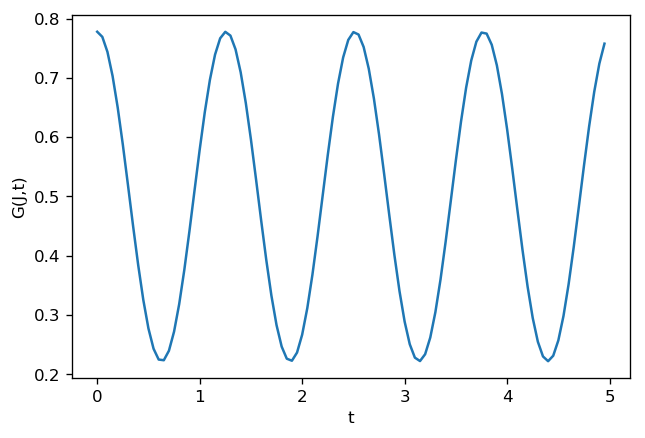

In [3]:
# Set states
J = 1
I = 1
F = [1, 2]  # Set two hyperfine levels
EF = [5, 10]  # Set energies

# Set K
K = 1

tIn = np.arange(0,5,0.05)

Gvec=GJt(J,tIn,K,I,F,EF)
plt.figure(dpi=120)
plt.plot(tIn,Gvec)
plt.xlabel('t')
plt.ylabel('G(J,t)')
plt.show()

# Alignment of hyperfine wavepackets following 1-photon preparation #

Following the above, and foundations from the previous notebooks, a full wavepacket can be modelled.

## State multipole definitions ##
Functions for the calculation of $\langle T(J)_{KQ}^{\dagger}\rangle$, and associated quantities, are given here, see the [Alignment 1 notebook for details and discussion](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-1.ipynb).

In [4]:
# T(J)KQ and associated defns from Alignment 1 notebook
# https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-1.ipynb

from sympy.physics.wigner import wigner_3j

# Define T(J,J')KQ matrix elements. 
# Eqn 4.9 in Blum (p118), note slight differences to eqn. 55, Zare, p236 - likely equivalent for J=Jp
# TODO: implement switch/dictionary for versions
def TjjpkqMatEle(Jp,J,K,Q,ver=0):
    
    Jmax = max(J,Jp)
    TKQmm = np.zeros((2*Jmax+1,2*Jmax+1))
    
    for M in range(-J,J+1,1):
        for Mp in range (-Jp,Jp+1,1):
            
            # TKQmm[M+J][Mp+J] = (-1)**(J-M)*clebsch_gordan(J,J,K,Mp,-M,Q) # T(J)KQ, Zare eqn. 55
            # TKQmm[M+J][Mp+J] = (-1)**(J-Mp)*clebsch_gordan(J,J,K,Mp,-M,Q) # T(J)KQ dagger, Zare eqn. 62
            TKQmm[Mp+Jp][M+J] = (-1)**(Jp-Mp)*sqrt(2*K+1)*wigner_3j(Jp,J,K,Mp,-M,-Q)
            
            
    return TKQmm  

# TKQs state multipoles
# Eqn. 4.31 in Blum (p124) - cf. eqn. 62 in Zare, p237.
# NOTE - this is <T^dagger>
# Assume isotropic distribution, or state following a 1-photon transition if p is passed
def TKQpmm(Jp, J, Ji = 0, p = None):
    
    # Determine density matrix - following 1-photon excitation to max(J,Jp)
    if p is not None:
        pmm = pmmCalcDiag(Ji,max(J,Jp),p) 
        # pass
    else:
    # Density matrix for isotropic ensemble
        pmm = np.eye(2*Jp+1,2*J+1)
    
    # Calculate T(Jf,K,Q) for pmm
    TKQ = []  # Native list to hold results
    thres = 1E-5
    Kmax = 2*max(J,Jp)+1
    
    for K in range(0,Kmax+1):
        for Q in range(0,K+1):
            KQmat = TjjpkqMatEle(Jp,J,K,Q) * pmm  # Array-wise multiplication of matrix elements
            TKQval = KQmat.sum()
            
            if np.abs(TKQval) > thres:
                TKQ.append([K,Q,KQmat.sum()])  # Store value if > threshold
            
    return np.array(TKQ)  # Convert to np array for later use

# Define 1-photon density matrix (final m-states), no frame rotation (diagonal)
from sympy.physics.wigner import wigner_3j

def pmmCalcDiag(Ji,Jf,p):
    
    pmm = np.zeros((2*Jf+1,2*Jf+1))
    
    for Mf in range(-Jf,Jf+1,1):
        for Mi in range(-Ji,Ji+1,1):
            pmm[Mf+Jf][Mf+Jf] += wigner_3j(Ji,p[0],Jf,-Mi,p[1],Mf)**2
                
    return pmm   


# Spatial distribution of J-vectors from T(J)KQ
# Use eqn. 101 in Blum (p148)

# Define Ylm(t,p) symbolically from Sympy
from sympy import Ynm
theta, phi = symbols("theta phi")
init_printing()

# Function to sum Ylm from a list, with optional normalisation.
# Include additional 3j term to implement eqn. 101, for real-space W(theta,phi) representation.
def sphSumTKQ(A, J, norm = 1.0):
    Atp = 0
    thres = 1E-5
    
    # Loop over rows in input & add YKQ terms (should be able to convert to list comprehension for brevity)
    for row in range(A.shape[0]):  
        if np.absolute(A[row][2]) > thres:
            angMomTerm = (-1)**J * (2*J+1) * wigner_3j(J,J,A[row][0],0,0,0)
            Atp += angMomTerm*Ynm(np.int(A[row][0]),np.int(A[row][1]),theta,phi) * A[row][2]/norm # Add TKQ*Y(K,Q) term
            
    return Atp*sqrt(1/(4*pi))

# Define numerical sum over a list of harmonics defined symbolically.
def sphNList(Y, tList, pList=[0]):
    Ytp = []
    for t in tList:
        for p in pList:
            Ytp.append(Y.evalf(subs={theta:t,phi:p}))

    return np.array(Ytp)


# Define density matrix p(Jp,Np,J,N) from TKQ - general version, eqn. 4.34 in Blum (p125)
# Uses TKQ tensor values (list)
def pJpNpJN(Jp,J,TKQ):
    Jmax = max(J,Jp)
    Pmm = np.zeros((2*Jmax+1,2*Jmax+1))
    
    for Mp in range(-Jp,Jp+1):
        for M in range(-J,J+1):
            for row in range(TKQ.shape[0]):
                Pmm[Mp+Jp][M+J] += (-1)**(Jp-Mp)*sqrt(2*TKQ[row][0]+1)*wigner_3j(Jp,J,TKQ[row][0],Mp,-M,-TKQ[row][1])*TKQ[row][2]
                
    return Pmm
 

## Time-dependent parameter definitions ##

Redefine $G(J;t)_{K}$ function to use an input list of hyperfine state parameters, and sum over all pairs $(F,F')$.

In [5]:
# (re)Define G(J;t)K, time-dependent part.
# This version uses a list for the parameter set, [J, I, F, EF]
def GJt(JFlist,K,t):
    if type(t) is int:
        G = 0
    else: 
        G = np.zeros(t.shape[0])
    
    # Set params assumed to be universal
    J = JFlist[0][0]
    I = JFlist[0][1]

    for n1 in range(0,JFlist.shape[0],1):
        for n2 in range(0,JFlist.shape[0],1): 
            
            # Calculate (2*Fp+1)*(2*F+1)*(wigner_6j(J,Fp,I,F,J,K)**2)*np.cos((EFp - EF)*t/hbar) using terms from input list
            Gterm = (2*JFlist[n2][2]+1)*(2*JFlist[n1][2]+1)*(wigner_6j(J,JFlist[n2][2],I,JFlist[n1][2],J,K)**2)*np.cos(((JFlist[n2][3] - JFlist[n1][3])*t)/hbar)
            
            G = np.add(G,Gterm)
                
    
    return G*(1/(2*I+1))

Define $\langle T(J;t)_{KQ}^{\dagger}\rangle$ as given above.

In [6]:
# Define T(J;t)KQ
def TJtKQ(JFlist,TKQ,t):
    
    Kref = -1
    TJt = []
    
    # Loop over initial TKQ values & calculate time-dependence
    for row in range(0,TKQ.shape[0],1):
        K = TKQ[row][0]
        Q = TKQ[row][1]
        
        # Check if GKvec already calculated for given K (independent of Q), assuming TKQ is ordered by K values
        if K != Kref:
            GKvec = GJt(JFlist,K,tIn)
            tempT = np.zeros(t.shape[0]) 
            Kref = K
        else:
            pass
        
        TJt.append(GKvec*TKQ[row][2])  # Set G*T value
        
    return np.array(TJt)

## Example: Xe dynamics & alignment ##

Here two examples are given, following the [work in ref. [4]](https://www.authorea.com/users/71114/articles/188337-quantum-beat-photoelectron-imaging-spectroscopy-of-xe-in-the-vuv), in which hyperfine wavepackets were prepared in Xe via excitation around 133 nm. Distinct wavepackets are created in the $^{129}Xe$ and $^{131}Xe$ isotopes, which have $I_{129}=1/2$ and $I_{131}=3/2$ and different hyperfine level structures.

In [7]:
# Set list of states, see table 1 in ref. [4]
# States [J, I, F, EF]

# E values from cm-1 to J
Jconv = 1.6021773E-19/8065.54429

# Set states for Xe129 case
JF129 = np.array([[1, 0.5, 0.5, 0*Jconv],[1, 0.5, 1.5, 0.2863*Jconv]])  # Differences in cm-1

# Set states for Xe131 case
JF131 = np.array([[1, 1.5, 0.5, 0*Jconv],[1, 1.5, 1.5, 0.0855*Jconv],[1, 1.5, 2.5, 0.2276*Jconv]])  # Differences in cm-1

### $^{129}Xe$ ###

[[ 0.          0.          0.19245009]
 [ 2.          0.         -0.27216553]]


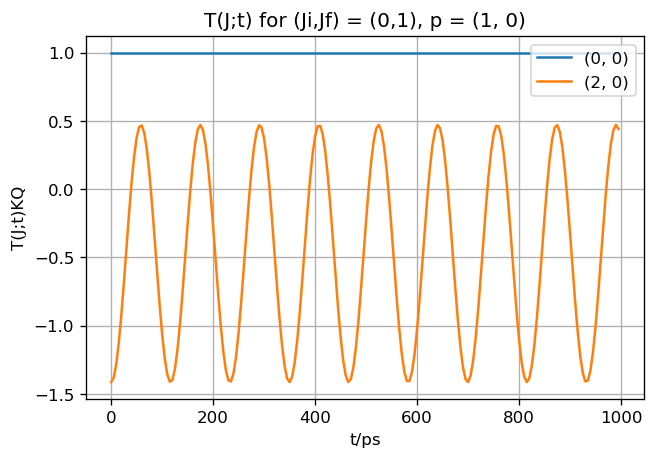

In [8]:
# Calculate 1-photon abs. and hyperfine wavepacket evolution

# Set t-axis, in ps
tIn = np.arange(0,1000,5)*1e-12

# Define intial & photon states
Ji = 0  # Initial |J>
p = (1,0)   # Coupling (photon) |1,q>

# Set final state parameters by isotope
JFlist = JF129
Jf = np.int(JFlist[0][0]) # Final state J

# Calculate T(J)KQ following 1-photon abs.
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
print(TKQ)

# Calculate T(J;t)KQ
TJt = TJtKQ(JFlist,TKQ,tIn)

# Plot with legend, label by (K,Q) values
norm = TJt[0,0]  # Optional normalisation by T(0,0) (population) term
plt.figure(dpi=120)
for n in range(0,TJt.shape[0],1):
    plt.plot(tIn/1e-12,TJt[n][:]/norm, label=str((np.int(TKQ[n][0]), np.int(TKQ[n][1]))))

plt.legend(loc='upper right')
plt.title('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
plt.xlabel('t/ps')
plt.ylabel('T(J;t)KQ')
plt.grid(True)
plt.show()

The dynamics show the expected, simple, quantum beat structure in
the $\langle T(J;t)_{KQ}^{\dagger}\rangle$. For 1-photon excitation,
with linearly polarised light, only $K=0,\,2,\,Q=0$ terms contribute.
The $(0,0)$ term reflects the total population, hence is temporally-invariant,
while the $(2,0)$ term shows the changing alignment as the wavepacket
evolves. 

The allowed terms, and phase of the quantum beats, depends on the transition - i.e. initial and final $J$ state, and photon angular momentum. For example, with circularly polarised light $M_p = +1$, terms with $K=1$ are also allowed, and are out-of-phase with $K=2$ terms.

[[ 0.          0.          0.19245009]
 [ 1.          0.         -0.23570226]
 [ 2.          0.          0.13608276]]


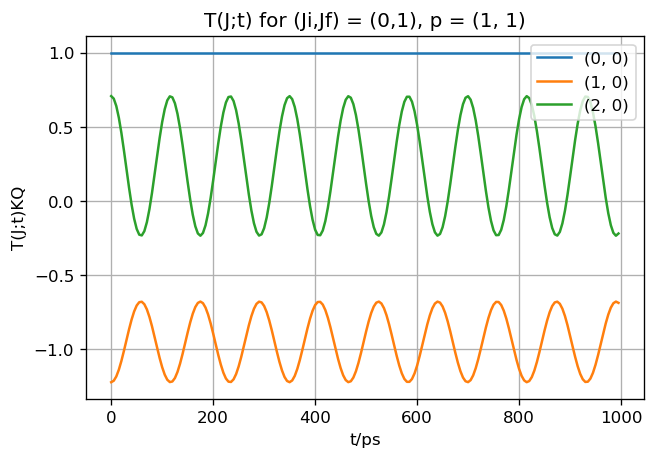

In [9]:
# Calculate 1-photon abs. and hyperfine wavepacket evolution

# Define intial & photon states
Ji = 0  # Initial |J>
p = (1,1)   # Coupling (photon) |1,q>

# Set final state parameters by isotope
JFlist = JF129
Jf = np.int(JFlist[0][0]) # Final state J

# Calculate T(J)KQ following 1-photon abs.
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
print(TKQ)

# Calculate T(J;t)KQ
TJt = TJtKQ(JFlist,TKQ,tIn)

# Plot with legend, label by (K,Q) values
norm = TJt[0,0]  # Optional normalisation by T(0,0) (population) term
plt.figure(dpi=120)
for n in range(0,TJt.shape[0],1):
    plt.plot(tIn/1e-12,TJt[n][:]/norm, label=str((np.int(TKQ[n][0]), np.int(TKQ[n][1]))))

plt.legend(loc='upper right')
plt.title('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
plt.xlabel('t/ps')
plt.ylabel('T(J;t)KQ')
plt.grid(True)
plt.show()

As previously (see [Alignment 1 notebook](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-1.ipynb)), the spatial distribution of the angular momentum vectors,
$W(\theta,\phi)$, can be calculated from the state multipoles.

T(J;t) for (Ji,Jf) = (0,1), p = (1, 1)

 At 1-photon abs.
[[ 0.          0.          0.19245009]
 [ 1.          0.         -0.23570226]
 [ 2.          0.          0.13608276]]

 At various t...


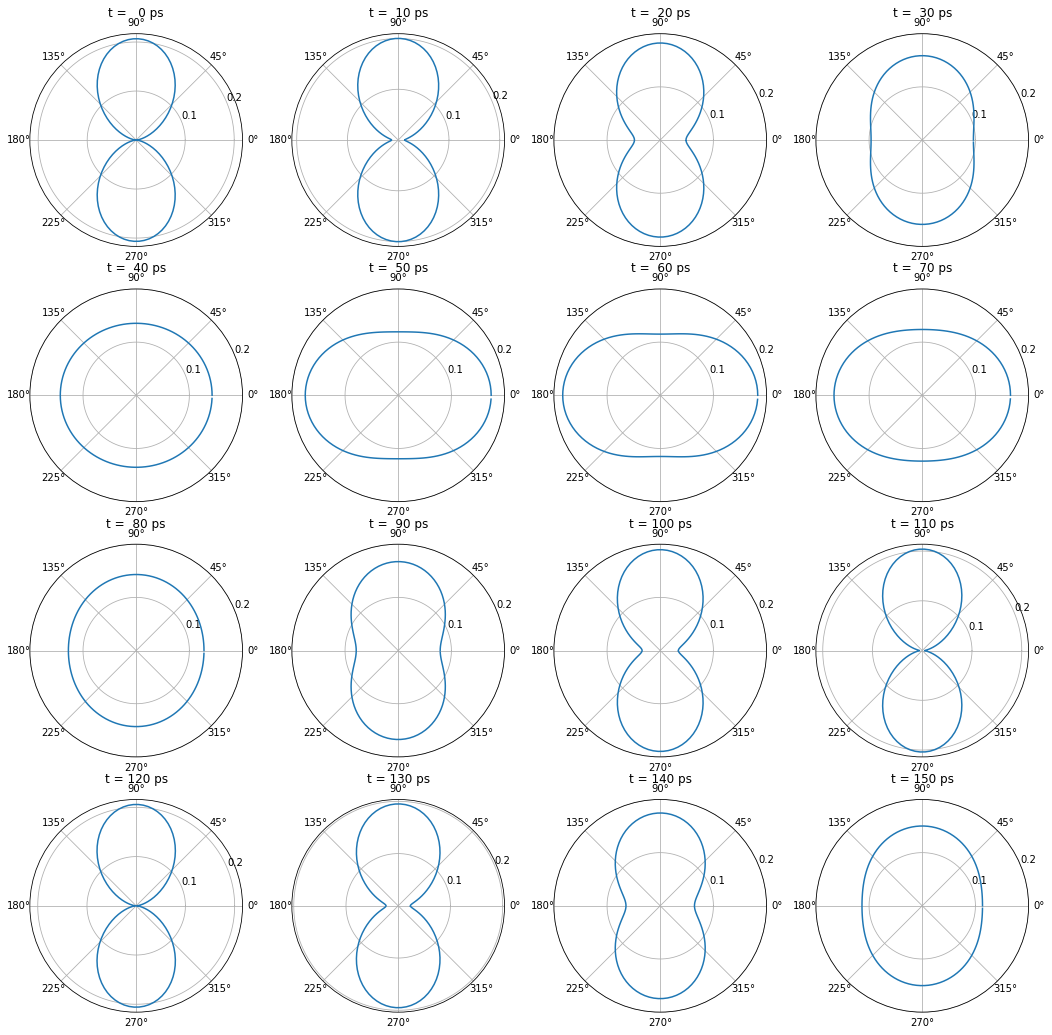

In [10]:
# Define temporal points to plot as index into tIn
tStart = 0
tEnd = 35
# tEnd = round(tIn.shape[0]/4)
tStep = 2

# Define theta values for plot
tList = np.arange(0,pi,0.05)

print('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
print('\n At 1-photon abs.')
print(TKQ)

print('\n At various t...')

# Set up subplots. For polar use, see example at https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
sPlots = [4,4]
fig, axes = plt.subplots(sPlots[0], sPlots[1], figsize=(18, 18), subplot_kw=dict(projection='polar')) 
n = m = 0

for tPlot in range(tStart,tEnd,tStep):
    # Calculate
    TKQin = np.vstack((TKQ[:,0:2].T,TJt[:,tPlot])).T
    Atp = sphSumTKQ(TKQin, Jf, norm = TKQin[0][2])
    Ytp = sphNList(Atp,tList)
    
    # Singe polar plot
    # plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)),fig=fig, ax=axes[n, m])  # Manual fix to symmetry for theta = 0:2pi
    
    # Polar subplot, with bounds checking
    if (m+1)+(n*sPlots[0])>(sPlots[0]*sPlots[1]):
        pass
    else:
        axes[n,m].plot(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)))
        axes[n,m].set_title('t = {:3.0f} ps'.format(tIn[tPlot]/1e-12))
        axes[n,m].set_rticks([0.1, 0.2])  # Reduce radial ticks
    
    # Subplot indexing
    m += 1
    if m >= sPlots[1]:
        m = 0
        n += 1
        
plt.show()

### $^{131}Xe$ ###

[[ 0.          0.          0.19245009]
 [ 1.          0.         -0.23570226]
 [ 2.          0.          0.13608276]]


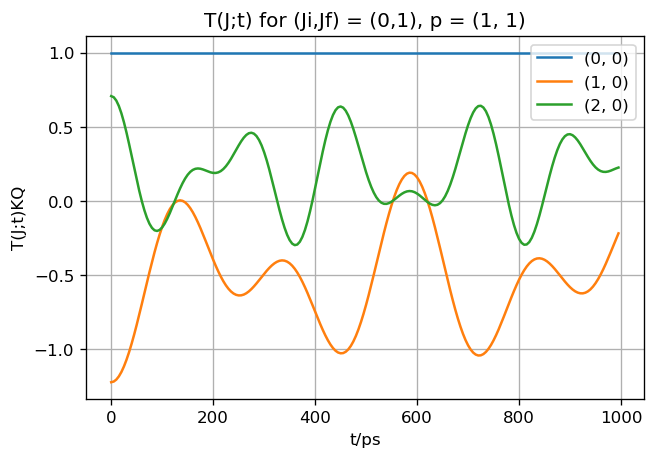

In [11]:
# Calculate 1-photon abs. and hyperfine wavepacket evolution

# Set final state parameters by isotope
JFlist = JF131
Jf = np.int(JFlist[0][0]) # Final state J

# Calculate T(J)KQ following 1-photon abs.
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)

print(TKQ)

# Calculate T(J;t)KQ
TJt = TJtKQ(JFlist,TKQ,tIn)

# Plot with legend, label by (K,Q) values
norm = TJt[0,0]  # Optional normalisation by T(0,0) (population) term
plt.figure(dpi=120)
for n in range(0,TJt.shape[0],1):
    plt.plot(tIn/1e-12,TJt[n][:]/norm, label=str((np.int(TKQ[n][0]), np.int(TKQ[n][1]))))

plt.legend(loc='upper right')
plt.title('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
plt.xlabel('t/ps')
plt.ylabel('T(J;t)KQ')
plt.grid(True)
plt.show()

A more interesting temporal structure is observed in this case, since the wavepacket comprises three eigenstates.

T(J;t) for (Ji,Jf) = (0,1), p = (1, 1)

 At 1-photon abs.
[[ 0.          0.          0.19245009]
 [ 1.          0.         -0.23570226]
 [ 2.          0.          0.13608276]]

 At various t...


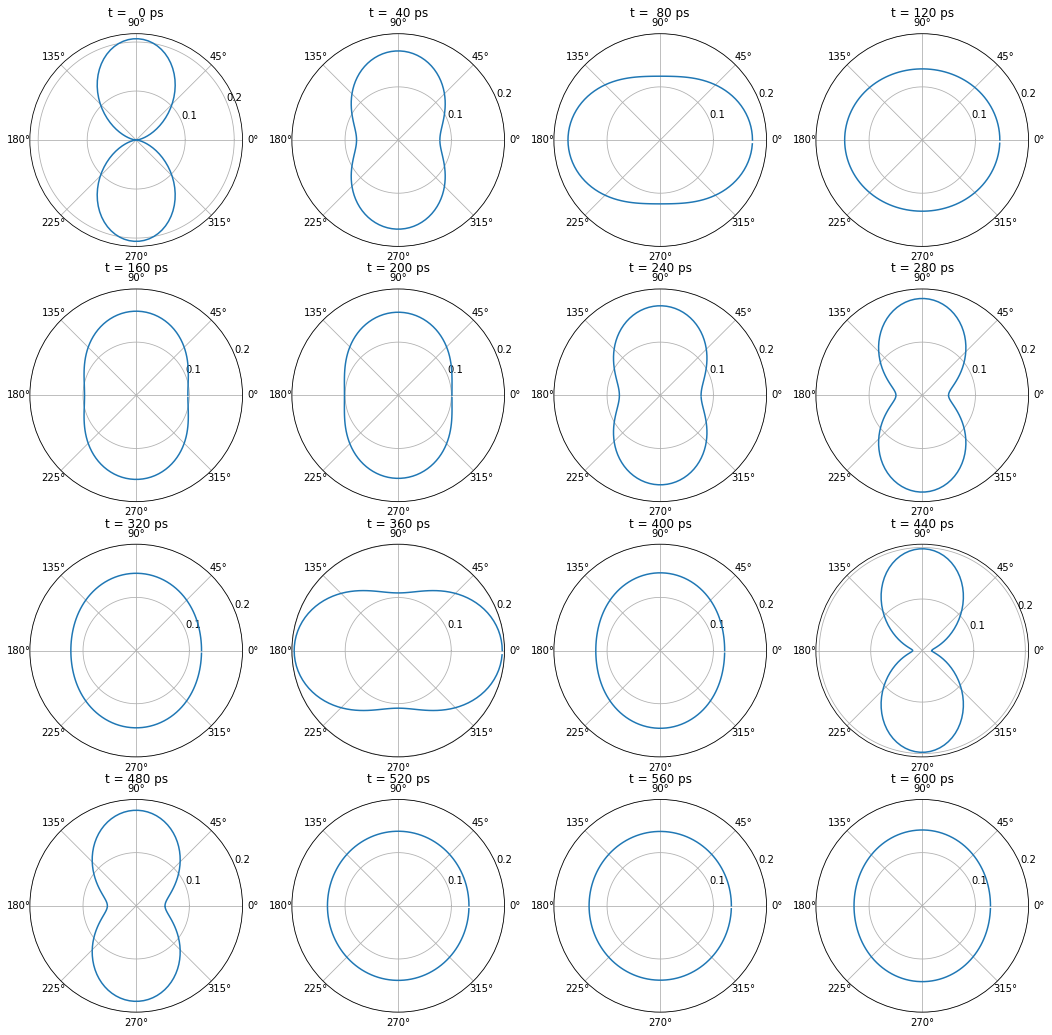

In [12]:
# Define temporal points to plot as index into tIn
tStart = 0
tEnd = 160
# tEnd = round(tIn.shape[0]/4)
tStep = 8

# Define theta values for plot
tList = np.arange(0,pi,0.05)

print('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
print('\n At 1-photon abs.')
print(TKQ)

print('\n At various t...')

# Set up subplots. For polar use, see example at https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
sPlots = [4,4]
fig, axes = plt.subplots(sPlots[0], sPlots[1], figsize=(18, 18), subplot_kw=dict(projection='polar')) 
n = m = 0

for tPlot in range(tStart,tEnd,tStep):
    # Calculate
    TKQin = np.vstack((TKQ[:,0:2].T,TJt[:,tPlot])).T
    Atp = sphSumTKQ(TKQin, Jf, norm = TKQin[0][2])
    Ytp = sphNList(Atp,tList)
    
    # Singe polar plot
    # plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)),fig=fig, ax=axes[n, m])  # Manual fix to symmetry for theta = 0:2pi
    
    # Polar subplot, with bounds checking
    if (m+1)+(n*sPlots[0])>(sPlots[0]*sPlots[1]):
        pass
    else:
        axes[n,m].plot(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)))
        axes[n,m].set_title('t = {:3.0f} ps'.format(tIn[tPlot]/1e-12))
        axes[n,m].set_rticks([0.1, 0.2])  # Reduce radial ticks
    
    # Subplot indexing
    m += 1
    if m >= sPlots[1]:
        m = 0
        n += 1
        
plt.show()

### Density matrix ###
As previously discussed (see [Alignment 1 notebook](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-1.ipynb)), the density matrix, $\rho$, can also be calculated
from the state multipoles - in the hyperfine wavepacket case, both
are time-dependent, and Eqn. 4.34 from Blum [1] can be (trivially)
modified:

\begin{equation}
\langle J'M'|\hat{\rho}(t)|JM\rangle=\sum_{M'M}(-1)^{J'-M'}(2K+1)^{1/2}\left(\begin{array}{ccc}
J' & J & K\\
M' & -M & -Q
\end{array}\right)\left\langle T(J',J;\,t)_{KQ}^{\dagger}\right\rangle 
\end{equation}

p(Jf;t) for (Ji,Jf) = (0,1), p = (1, 1)


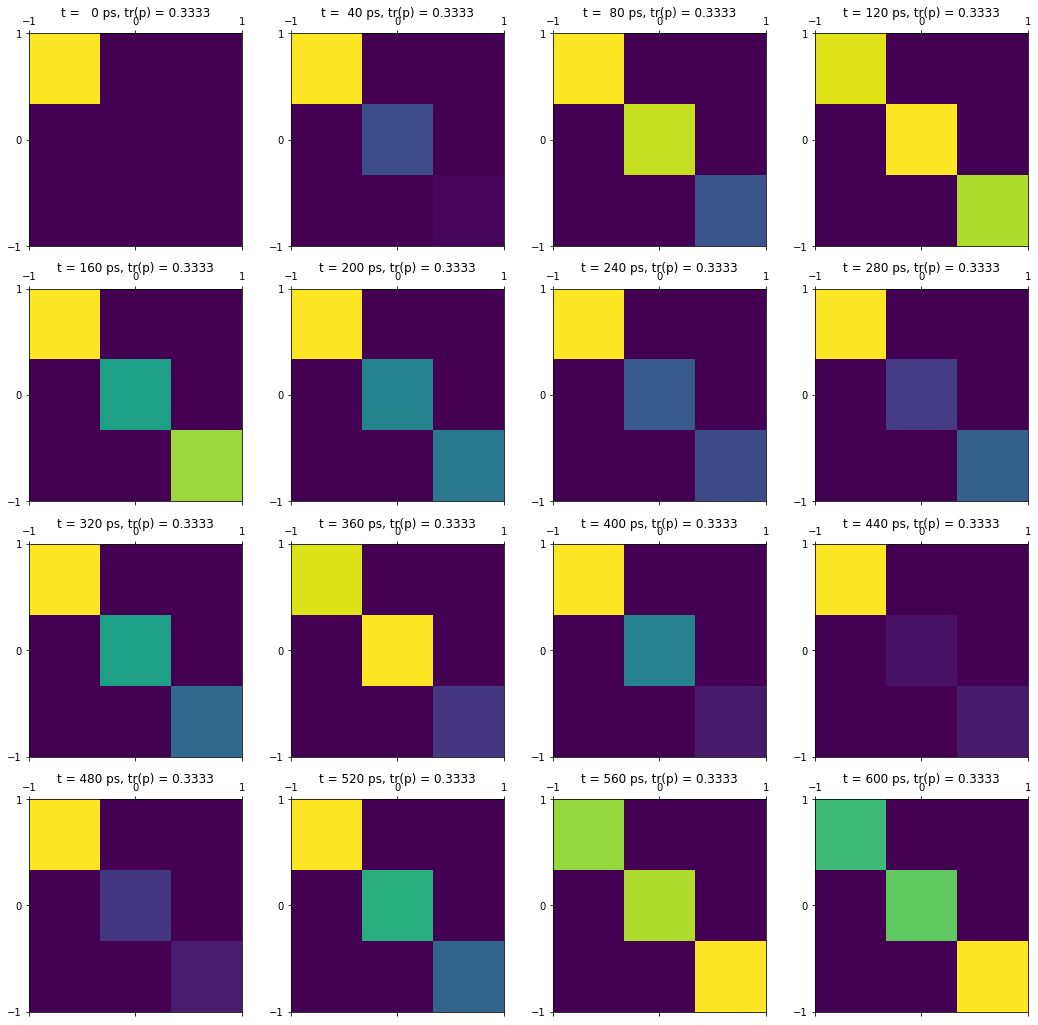

In [13]:
# Set up subplots. For polar use, see example at https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
sPlots = [4,4]
fig, axes = plt.subplots(sPlots[0], sPlots[1], figsize=(18, 18)) 
n = m = 0

Jf = np.int(JFlist[0][0]) # Final state J

print('p(Jf;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))

for tPlot in range(tStart,tEnd,tStep):
    # Calculate
    TKQin = np.vstack((TKQ[:,0:2].T,TJt[:,tPlot])).T
    pmm = pJpNpJN(Jf,Jf,TKQin)  # Determine pmm
    
    # Singe polar plot
    # plt.polar(np.concatenate((tList, tList+pi)),np.concatenate((Ytp, Ytp)),fig=fig, ax=axes[n, m])  # Manual fix to symmetry for theta = 0:2pi
    
    # Polar subplot, with bounds checking
    if (m+1)+(n*sPlots[0])>(sPlots[0]*sPlots[1]):
        pass
    else:
        axes[n,m].matshow(pmm/np.trace(pmm), extent = (-Jf,Jf,-Jf,Jf), aspect = 'equal') 
        axes[n,m].set_title('t = {:3.0f} ps, tr(p) = {:1.4f}'.format(tIn[tPlot]/1e-12,np.trace(pmm)))
    
    # Subplot indexing
    m += 1
    if m >= sPlots[1]:
        m = 0
        n += 1
        
plt.show()

### Why are there oscillations, and what is aligned here? ###

The density matrix here reflects the changing alignment in terms of
the $|J,M_{J}\rangle$ (electronic) state populations. The total population,
$tr(\rho)$, is temporally invariant. In this case, it is the hyperfine
interaction that couples $M_{J}$ levels and mediates population transfer.
Any observable sensitive to the $M_{J}$ alignment (e.g. polarisation
of emitted light) will reflect the temporal modulations in some manner.

Physically, this can be considered as the result of angular momentum
exchange between the nuclear $|I,M_{I}\rangle$ and electronic $|J,M_{J}\rangle$
terms; the total (coupled) angular momentum $|F,M_{F}\rangle$ remains
constant, and time-invariant. A similar treatment can yield the nuclear
alignment, in terms of the density matrix in the $\{|I,M_{I}\rangle\}$
representation, hence $M_{I}$ level populations. For an extended
discussion on this point, see Fano & Macek [5], particularly
Sect. III.3. As noted therein, the conservation of total angular momentum
dictates that the nuclear angular momentum orientation ($K=1$) oscillations
are out-of-phase with the electronic terms, while a more complex relation
is observed for alignment ($K=2$) terms.

For the nuclear angular momentum oscillations, Fano & Macek, Eqn.
39, gives:

\begin{equation}
G(I;t)_{K}=\frac{1}{2I+1}\sum_{F',F}-1^{(F'-F)}(2F'+1)(2F+1)\left\{ \begin{array}{ccc}
F' & F & K\\
I & I & J
\end{array}\right\} \left\{ \begin{array}{ccc}
F' & F & K\\
J & J & I
\end{array}\right\} \cos\left[\frac{(E_{F'}-E_{F})t}{\hbar}\right]
\end{equation}

And for the electronic angular momentum oscillations, Fano & Macek
Eqn. 37 (essentially identical to the formulation from Blum given
previously, with just a reordering of the $6j$ terms):

\begin{equation}
G(J;t)_{K}=\frac{1}{2I+1}\sum_{F',F}(2F'+1)(2F+1)\left\{ \begin{array}{ccc}
F' & F & K\\
J & J & I
\end{array}\right\} ^{2}\cos\left[\frac{(E_{F'}-E_{F})t}{\hbar}\right]
\end{equation}


In [14]:
# Define G(I;t)K, time-dependent nuclear part - see Eqn. 39 in Fano & Macek [5]
# This version uses a list for the parameter set, [J, I, F, EF]
def GIt(JFlist,K,t):
    if type(t) is int:
        G = 0
    else: 
        G = np.zeros(t.shape[0])
    
    # Set params assumed to be universal
    J = JFlist[0][0]
    I = JFlist[0][1]

    for n1 in range(0,JFlist.shape[0],1):
        for n2 in range(0,JFlist.shape[0],1): 
            
            Fphase = (-1)**(JFlist[n2][2]-JFlist[n1][2])
            degen = (2*JFlist[n2][2]+1)*(2*JFlist[n1][2]+1)
            sixJs = wigner_6j(JFlist[n2][2],JFlist[n1][2],K,I,I,J)*wigner_6j(JFlist[n2][2],JFlist[n1][2],K,J,J,I)
        
            Gterm = Fphase*degen*sixJs*np.cos(((JFlist[n2][3] - JFlist[n1][3])*t)/hbar)
            
            G = np.add(G,Gterm)
                
    
    return G*(1/(2*I+1))

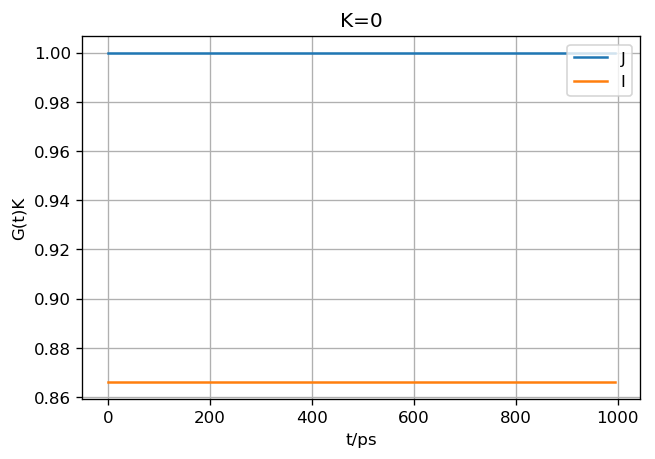

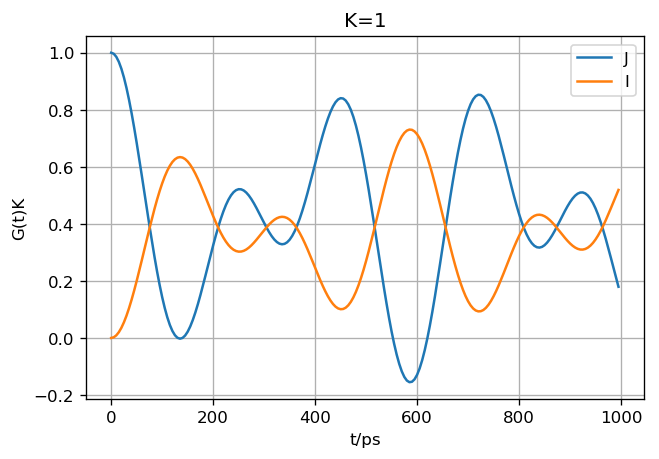

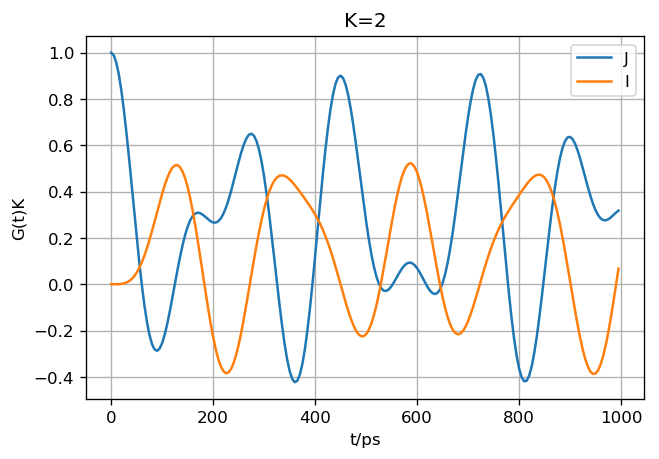

In [15]:
# Plot G(J;t) and G(I;t)
JFlist = JF131

for K in range(0,3):
    plt.figure(dpi=120)
    
    Gvec=GJt(JFlist,K,tIn)
    plt.plot(tIn/1e-12,Gvec,label='J')

    Gvec=GIt(JFlist,K,tIn)
    plt.plot(tIn/1e-12,Gvec,label='I')
    
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.title('K={0}'.format(K))
    plt.xlabel('t/ps')
    plt.ylabel('G(t)K')
    plt.show()